In [82]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [120]:
dong='가회동'

In [136]:
dust_data_jongro=pd.read_pickle('final_jongro.pickle')
dust_data_nowon=pd.read_pickle('final_nowon.pickle')

In [137]:
dic_nowon = {'V10O1610629':'공릉1동', 'V10O1610630':'공릉1동', 'V10O1611652':'공릉2동',
       'V10O1610642':'공릉2동', 'V10O1610356':'상계1동', 'V10O1610312':'상계2동', 
       'V10O1611100':'상계2동', 'V10O1610616':'상계2동', 'V10O1610200':'상계2동',
       'V10O1611150':'상계3,4동', 'V10O1610297':'상계5동', 'V10O1611102':'상계5동', 
       'V10O1610351':'상계6,7동', 'V10O1611104':'상계6,7동', 'V10O1610376':'상계6,7동',
       'V10O1610293':'상계10동', 'V10O1611229':'월계1동', 'V10O1610643':'월계3동',
       'V10O1611097':'중계2,3동','V10O1612126':'중계본동', 
       'V10O1610102':'하계1동', 'V10O1610610':'하계1동'}
dic_jongro = {'V10O1611634':'가회동', 'V10O1611698':'가회동', 'V10O1611722':'가회동', 
       'V10O1610252':'교남동', 'V10O1611887':'명동', 'V10O1611170':'부암동',
       'V01o1610468':'사직동', 'V10O1611172':'사직동', 'V10O1612106':'숭인2동',
       'V10O1611658':'이화동', 
       'V10O1610546':'종로 1,2,3,4가동', 'V10O1610540':'종로 1,2,3,4가동',
       'V10O1610542':'종로 1,2,3,4가동', 'V10O1610543':'종로 1,2,3,4가동',
       'V10O1610544':'종로 1,2,3,4가동', 'V10O1610545':'종로 1,2,3,4가동',
       'V10O1610567':'종로 1,2,3,4가동', 'V10O1612113':'종로 1,2,3,4가동',
       'V10O1611145':'종로 1,2,3,4가동', 'V10O1611750':'종로 1,2,3,4가동',
       'V10O1611684':'종로 1,2,3,4가동', 'V10O1611173':'종로 1,2,3,4가동',
       'V10O1611639':'종로5,6가동', 'V10O1611151':'창신1동', 'V10O1611220':'창신1동', 
       'V10O1611251':'창신3동', 'V10O1611289':'천연동', 'V10O1611255':'청운효자동',
       'V10O1611258':'평창동', 'V10O1611623':'혜화동', 'V10O1611645':'혜화동'}

In [139]:
dust_data_nowon['serial']=dust_data_nowon['serial'].replace(dic_nowon)
dust_data_jongro['serial']=dust_data_jongro['serial'].replace(dic_jongro)
dust_data_nowon=dust_data_nowon.groupby(['date','serial']).mean()
dust_data_jongro=dust_data_jongro.groupby(['date','serial']).mean()
dust_data=pd.concat([dust_data_nowon,dust_data_jongro],axis=0)

KeyError: 'serial'

In [124]:
dust_혜화=dust_data[dust_data['serial']==dong]

In [125]:
holiday2=['20180401','20180407','20180408','20180414','20180415','20180421','20180422','20180428','20180429','20180505',
          '20180506','20180512','20180513','20180519','20180520','20180521','20180522','20180526','20180527','20180602',
          '20180603','20180606','20180609','20180610','20180616','20180617','20180623','20180624','20180630','20180701',
          '20180707','20180708','20180714','20180715','20180721','20180722','20180728','20180729','20180804','20180805',
          '20180811','20180812','20180815','20180818','20180819','20180825','20180826','20180901','20180902','20180908',
          '20180909','20180915','20180916','20180922','20180923','20180924','20180925','20180926','20180927','20180928',
          '20180929','20180930','20181003','20181006','20181007','20181009','20181013','20181014','20181020','20181021',
          '20181027','20181028','20181103','20181104','20181110','20181111','20181117','20181118','20181124','20181125',
          '20181201','20181202','20181208','20181209','20181215','20181216','20181222','20181223','20181224','20181225',
          '20181229','20181230','20181231','20190101','20190105','20190106','20190112','20190113','20190119','20190120',
          '20190126','20190127','20190202','20190203','20190204','20190205','20190206','20190207','20190208','20190209',
          '20190210','20190216','20190217','20190223','20190224','20190301','20190302','20190303','20190309','20190310',
          '20190316','20190317','20190323','20190324','20190330','20190331']
holiday_np=np.array(holiday2)

In [126]:
card_data=pd.read_pickle('card')
card_data.STD_DD=pd.to_datetime(card_data.STD_DD,format='%Y-%m-%d')

C:\Users\Chacrew\Anaconda3\envs\chacrew\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


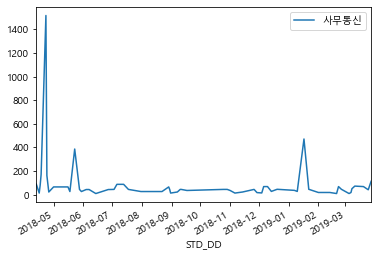

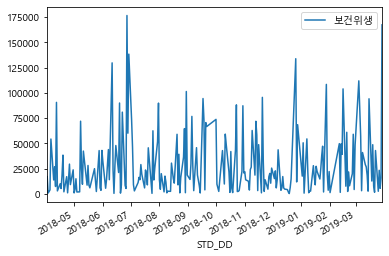

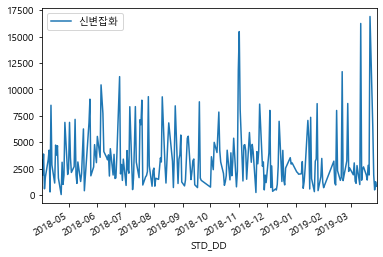

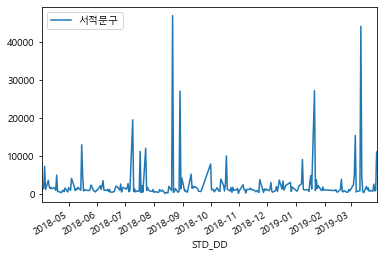

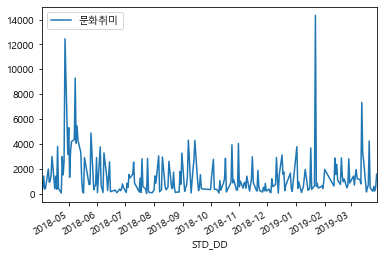

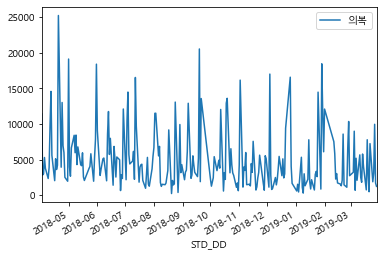

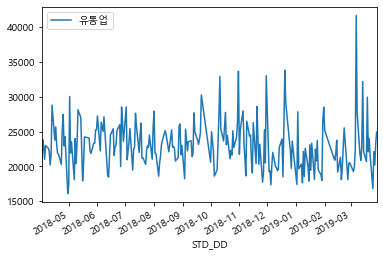

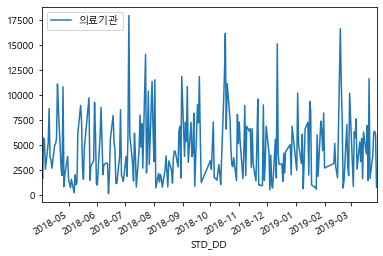

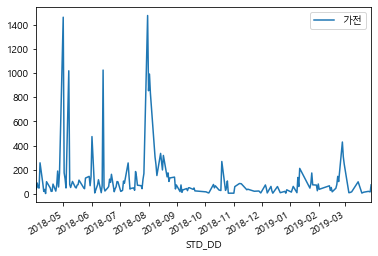

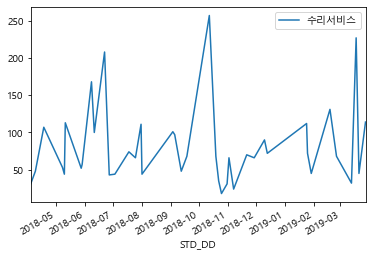

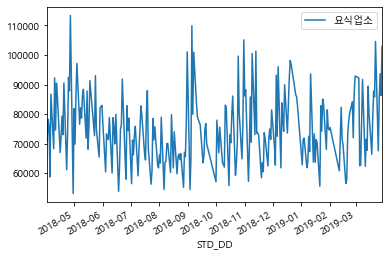

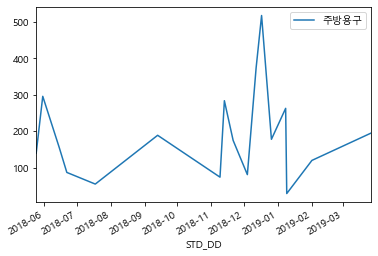

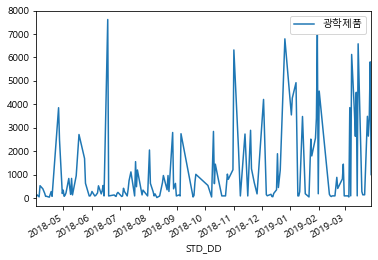

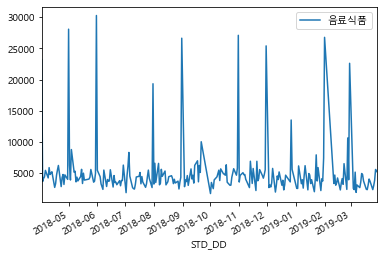

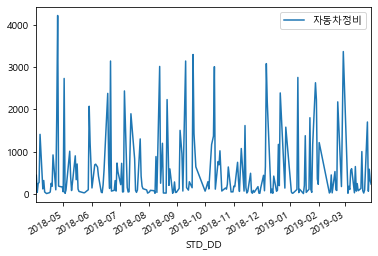

In [127]:
# card_df=pd.DataFrame()
for i,j in enumerate(item_list):
    if i==0:
        card_df=tem1[tem1['MCT_CAT_CD']==j]
        del card_df['MCT_CAT_CD'],card_df['USE_CNT']
        card_df.rename(columns = {'USE_AMT':j}, inplace = True)
    else:
        tem2=tem1[tem1['MCT_CAT_CD']==j]
        del tem2['MCT_CAT_CD'],tem2['USE_CNT']
        tem2.rename(columns = {'USE_AMT':j}, inplace = True)
        card_df=card_df.merge(tem2,how='outer',on='STD_DD')
result=card_df.merge(dust_혜화[['date','pm25','pm10','pm_class']],how='inner',left_on='STD_DD',right_on='date')
del result['date']

#평일
tem=card_data[(card_data['DONG_CD']==dong)&(~card_data.STD_DD.isin(holiday_np))].groupby(['MCT_CAT_CD','STD_DD']).sum()
tem1=tem.reset_index()
item_list=set(tem1['MCT_CAT_CD'])
for i in list(item_list):
    tem1[tem1['MCT_CAT_CD']==i].plot(kind='line',x='STD_DD',y='USE_AMT').legend([i])

In [132]:
dust_혜화[:5]

,serial,date,pm10,pm10_class,msg_10,pm25,pm25_class,msg_25,pm_class,pm_class_info


In [128]:
# 평일 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = result.corr(method = 'pearson'), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1080x1080 with 0 Axes>

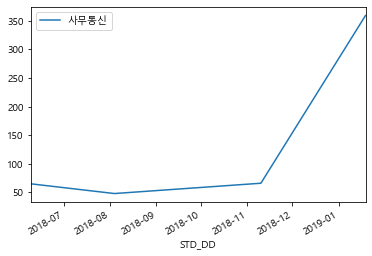

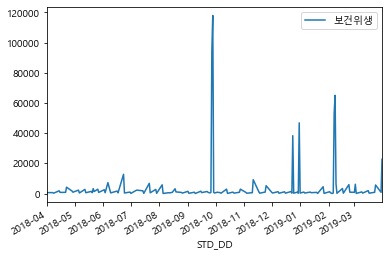

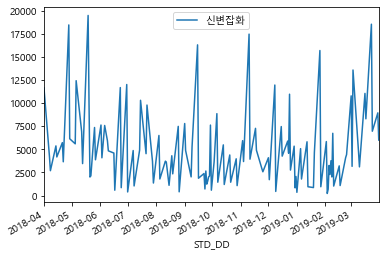

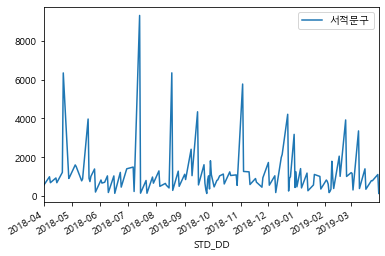

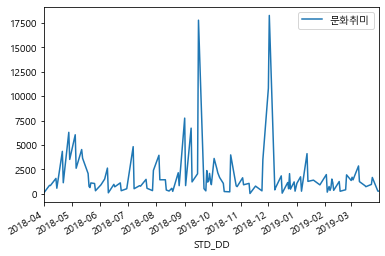

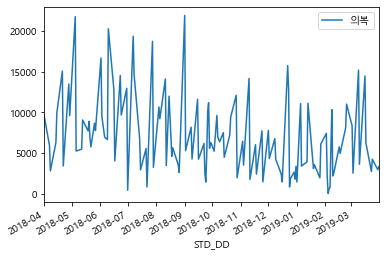

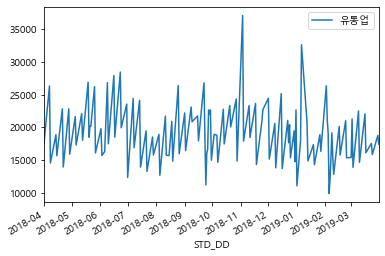

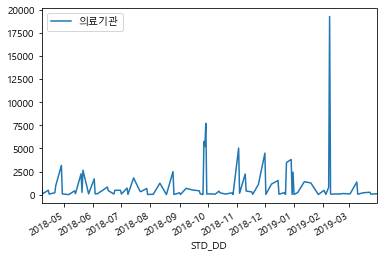

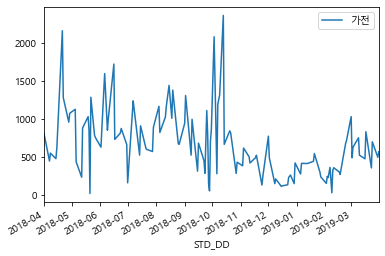

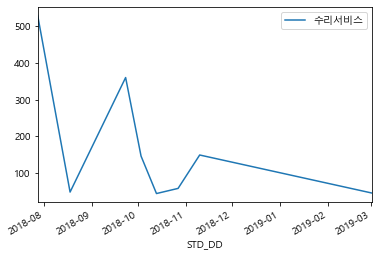

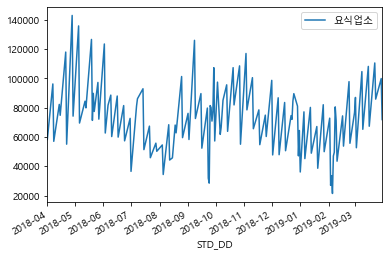

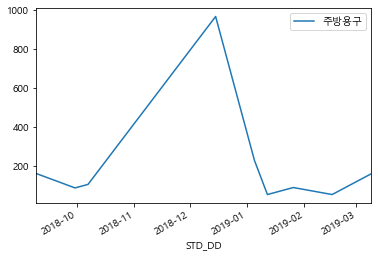

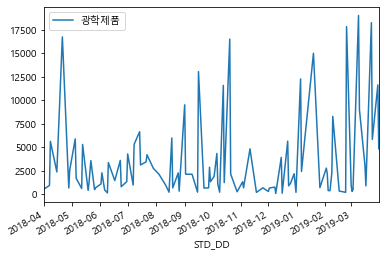

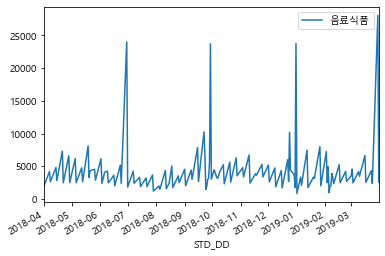

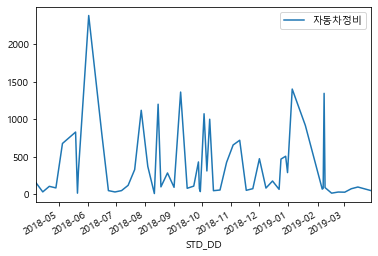

In [92]:
#공휴일
tem_holi=card_data[(card_data['DONG_CD']==dong)&(card_data.STD_DD.isin(holiday_np))].groupby(['MCT_CAT_CD','STD_DD']).sum()
tem_holi1=tem_holi.reset_index()

for i,j in enumerate(item_list):
    if i==0:
        card_holi_df=tem_holi1[tem_holi1['MCT_CAT_CD']==j]
        del card_holi_df['MCT_CAT_CD'],card_holi_df['USE_CNT']
        card_holi_df.rename(columns = {'USE_AMT':j}, inplace = True)
    else:
        tem2=tem_holi1[tem_holi1['MCT_CAT_CD']==j]
        del tem2['MCT_CAT_CD'],tem2['USE_CNT']
        tem2.rename(columns = {'USE_AMT':j}, inplace = True)
        card_holi_df=card_holi_df.merge(tem2,how='outer',on='STD_DD')
        
for i in list(item_list):
    tem_holi1[tem_holi1['MCT_CAT_CD']==i].plot(kind='line',x='STD_DD',y='USE_AMT').legend([i])

In [93]:
result_holi=card_holi_df.merge(dust_혜화[['date','pm25','pm10','pm_class']],how='inner',left_on='STD_DD',right_on='date')
del result_holi['date']

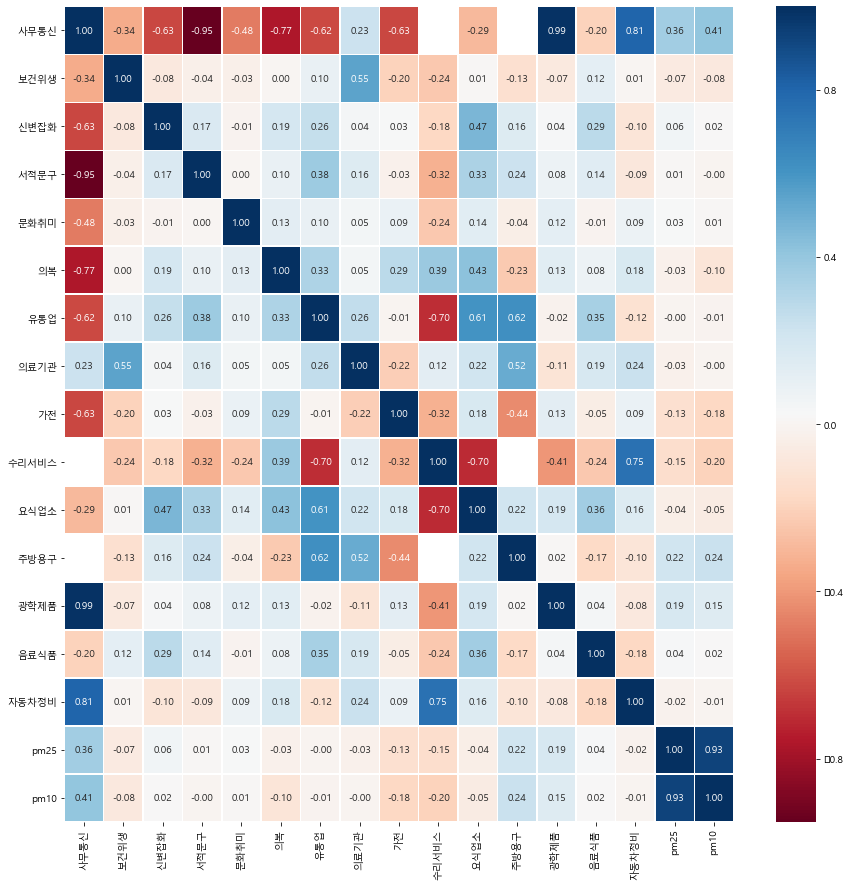

In [94]:
# 공휴일 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = result_holi.corr(method = 'pearson'), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

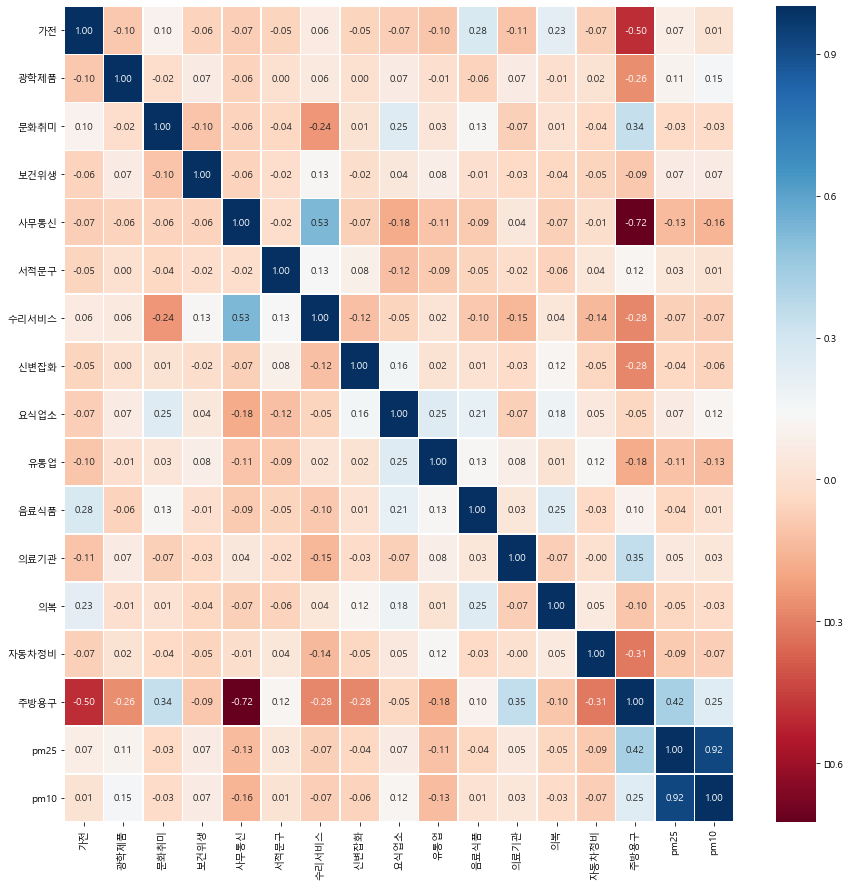

In [101]:

#전체
tem_mer=tem.USE_AMT.unstack(0).merge(dust_혜화[['date','pm25','pm10','pm_class']],how='inner',left_on='STD_DD',right_on='date')

# 총 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = tem_mer.corr(method = 'pearson'), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

In [96]:
tem_mer.to_pickle('card_'+str(dong)+'_1year')